In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [24]:
y_train

array([5, 4, 3, ..., 9, 6, 4])

In [5]:
pipe_svc = make_pipeline(StandardScaler(), PCA(), SVC())
pipe_svc.fit(X_train, y_train)
pipe_svc.score(X_test, y_test)

0.9888888888888889

In [6]:
param_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C' : param_range,
               'pca__n_components': [20, 30, 40],
               'svc__kernel' : ['linear']},
              {'svc__C' : param_range,
               'pca__n_components': [20, 30, 40],
               'svc__gamma': param_range,
               'svc__kernel' : ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, refit=True, n_jobs=-1)

In [7]:
gs = gs.fit(X_train, y_train)

In [8]:
best_svc = gs.best_estimator_

In [9]:
best_svc.score(X_test, y_test)

0.9814814814814815

# Learning Curve


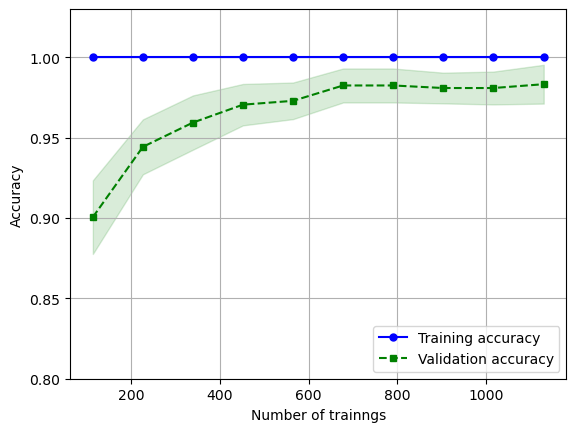

In [11]:
train_sizes, train_scores, test_scores = learning_curve(estimator=best_svc, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1,10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')

plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, linestyle='--', label='Validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of trainngs')
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

In [12]:
pipe_tree = make_pipeline(StandardScaler(),PCA(), DecisionTreeClassifier())
pipe_tree.fit(X_train, y_train)
pipe_tree.score(X_test, y_test)

0.8314814814814815

In [13]:
paramTree_grid = {
                  'pca__n_components': [20, 30, 40],
                  'decisiontreeclassifier__max_depth' : [30, 60, 100, 140, 180]
                  }

gsTree = GridSearchCV(estimator=pipe_tree, param_grid=paramTree_grid, scoring='accuracy', cv=10, refit=True, n_jobs=-1)

In [14]:
gsTree = gsTree.fit(X_train, y_train)

In [15]:
best_tree = gsTree.best_estimator_

In [16]:
best_tree.score(X_test, y_test)

0.8296296296296296

# Visualizing PCA

In [17]:
pca = PCA()
sc = StandardScaler()


In [18]:
X_train_std = sc.fit_transform(X_train)
pca.fit(X_train_std)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

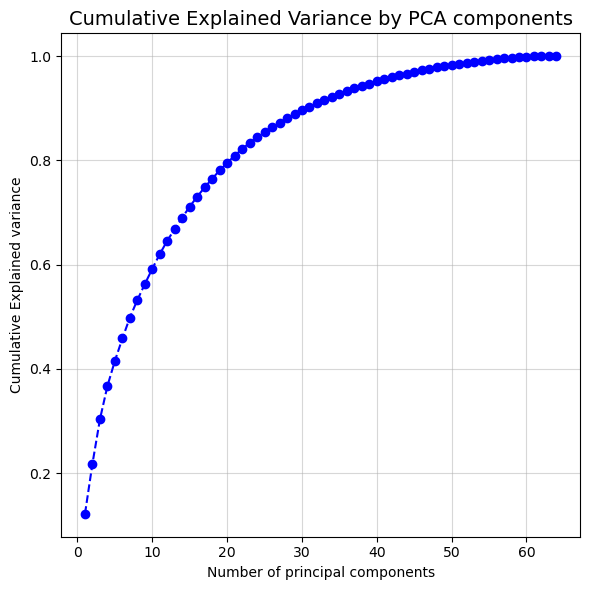

In [19]:
plt.figure(figsize=(6,6))

plt.plot(range(1, len(explained_variance) + 1),explained_variance, marker='o', linestyle='--', color='b')
plt.title("Cumulative Explained Variance by PCA components", fontsize=14)
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative Explained variance")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

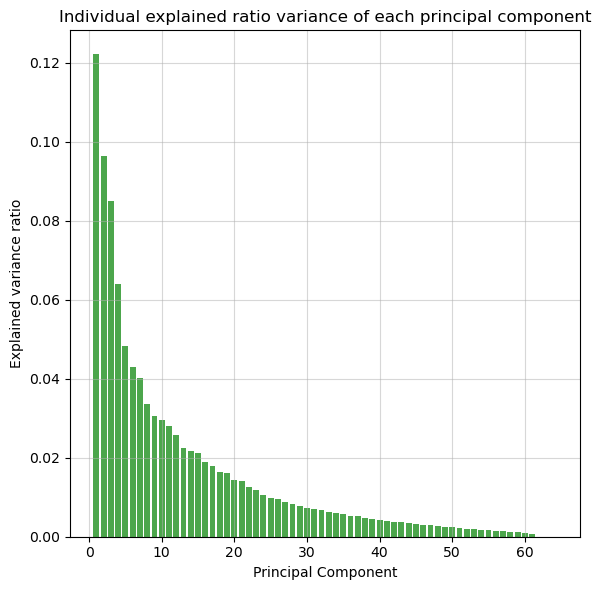

In [20]:
plt.figure(figsize=(6,6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
        pca.explained_variance_ratio_,
        alpha=0.7, color='g')

plt.title("Individual explained ratio variance of each principal component")
plt.xlabel("Principal Component")
plt.ylabel("Explained variance ratio")
plt.grid(alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

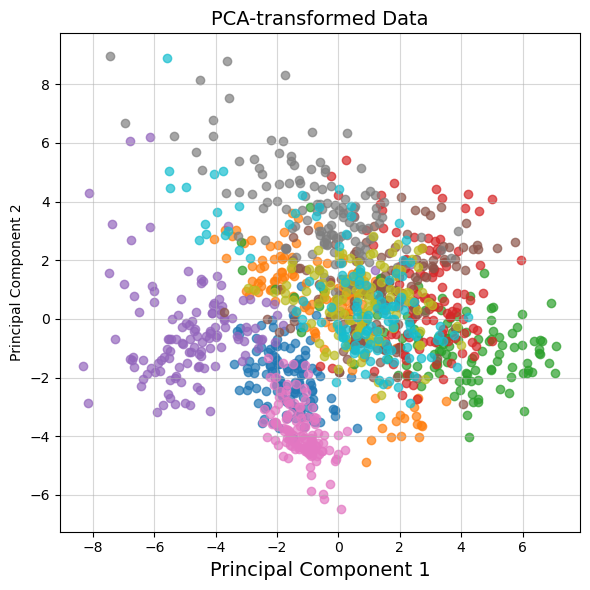

In [21]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_std)

plt.figure(figsize=(6,6))

for label in np.unique(y_train):
    plt.scatter(
        X_pca_2d[y_train == label, 0],
        X_pca_2d[y_train == label, 1],
        label=f'Class {label}', alpha=0.7
    )
    
plt.title("PCA-transformed Data", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


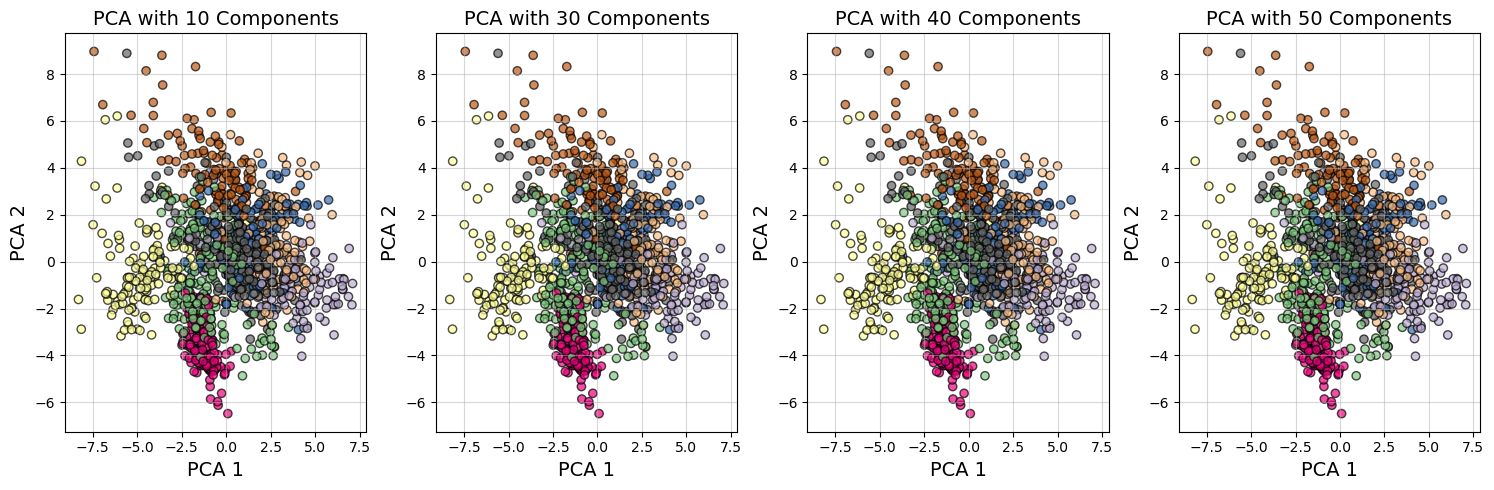

In [22]:
n_components_list = [10, 30, 40, 50]
fig, axes = plt.subplots(1, len(n_components_list), figsize=(15,5))

for i in range(4):
    pcaN = PCA(n_components=n_components_list[i])
    X_n_pca = pcaN.fit_transform(X_train_std)
    
    axes[i].scatter(
        X_n_pca[:, 0],
        X_n_pca[:, 1],
        c=y_train, cmap='Accent', alpha=0.7, edgecolor='k'
    )
    axes[i].set_title(f"PCA with {n_components_list[i]} Components", fontsize=14)
    axes[i].set_xlabel("PCA 1", fontsize=14)
    axes[i].set_ylabel("PCA 2", fontsize=14)
    axes[i].grid(alpha=0.5)
    
plt.tight_layout()
plt.show()